<style  type="text/css"> 
cool {
  width: 100px;
  height: 100px;
  background-color: red;
  position: relative;
  -webkit-animation-name: example; /* Safari 4.0 - 8.0 */
  -webkit-animation-duration: 4s; /* Safari 4.0 - 8.0 */
  -webkit-animation-iteration-count: infinite; /* Safari 4.0 - 8.0 */
  animation-name: example;
  animation-duration: 4s;
  animation-iteration-count: infinite;
}

/* Safari 4.0 - 8.0 */
@-webkit-keyframes example {
  0%   {background-color:red; left:0px; top:0px;}
  25%  {background-color:yellow; left:200px; top:0px;}
  50%  {background-color:blue; left:200px; top:200px;}
  75%  {background-color:green; left:0px; top:200px;}
  100% {background-color:red; left:0px; top:0px;}
}

/* Standard syntax */
@keyframes example {
  0%   {background-color:red; left:0px; top:0px;}
  25%  {background-color:yellow; left:200px; top:0px;}
  50%  {background-color:blue; left:200px; top:200px;}
  75%  {background-color:green; left:0px; top:200px;}
  100% {background-color:red; left:0px; top:0px;}
}
</style>

<b><center>
<span style="font-size: 24pt; line-height: 1.2">
STAT GU4243: Applied Data Science<br>
Fall 2023 
</span>
</center></b>
<br>
<p>
<i><center>
<span style="font-size: 20pt; line-height: 1.2">
 Unveiling Happiness Narratives: Are Achievements and Affections the Universal Cornerstones of Joy?<br>
</span>
</center></i>

# **Introduction**


Uncovering the fundamental elements of happiness is an enthralling adventure in a world bursting with various experiences. Data science is emerging as a powerful tool to interpret the complexities of delight that resonate with people across diverse spectrum of life as we stand at the nexus of technology and humanity.  I started a project called "Unveiling Happiness Narratives: Are Achievements and Affections the Universal Cornerstones of Joy?" in which I examine the rich tapestry of happiness narratives in an effort to determine whether achievements and affectionate moments have a general appeal for promoting happiness.

To explore this intriguing environment, I used a vast collection of individual joyful memories captured in the HappyDB dataset—a massive collection of 100,000 crowd-sourced happy moment.  I meticulously cleaned and prepped the data, taking use of the subtleties that were built into this dataset. This allowed for a quick way to identify insightful patterns and correlations. As noted in the Cleaning and EDA notebook in the lib folder, a robust method was developed for this project to calculate happiness scores based on sentiment polarity, lexical choices, and contextual relevance, serving as the cornerstone of this analytical journey.

The exploratory data analysis places a particular emphasis on the two dominating categories that stood out: "Achievement" and "Affection". These categories account for a startling 67% of all narratives, making it possible to examine happiness dynamics from the perspectives of gender and cultural orientation. Through these narratives, the project's analytical journey explores the subtleties and interactions that contribute to the elevated happiness levels shown in these categories.


In the forthcoming sections, we delve deeper, classifying the stories by gender and location, hoping to find underlying trends and, perhaps, fundamental truths about happiness. In addition to shedding light on what makes people happy, we hope that our investigation will deepen our awareness of and appreciation for the happy moments that connect us all, regardless of our differences in gender or location.

Through this project, I hope to create a data story that resonates with the sweet notes of success and affection, perhaps hinting at themes of joy that are shared by all people everywhere.






In [4]:
import pandas as pd


In [5]:
data = pd.read_csv("../output/final_data.csv")
data.head()

/var/folders/2j/xl2qzfzd781b4n_vgf720t2h0000gn/T/ipykernel_21838/2864877089.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../output/final_data.csv")


,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,stems,stem_dict,completed_text,age,country,gender,marital,parenthood,sentiment_polarity,token_count,happiness_score
0,27673,2053,24h,I went on a successful date with someone I fel...,i went on a successful date with someone i fel...,True,1,NaN,affection,i went on a success date with someon i felt sy...,"{'i': 2, 'went': 1, 'on': 1, 'a': 1, 'successf...",i 1 on a success 1 with someon i 1 sympathi an...,35,USA,m,single,n,0.750000,14,0.522859
1,27873,2053,24h,I played a new game that was fun and got to en...,i played a new game that was fun and got to en...,True,1,NaN,leisure,i play a new game that wa fun and got to enjoy...,"{'i': 1, 'played': 1, 'a': 1, 'new': 1, 'game'...",i play a 1 1 that wa 1 and 1 to 1 the mechan o...,35,USA,m,single,n,0.109091,16,0.276547
2,28073,2053,24h,I listened to some music and heard an entire a...,i listened to some music and heard an entire a...,True,1,NaN,leisure,i listen to some music and heard an entir albu...,"{'i': 2, 'listened': 1, 'to': 1, 'some': 1, 'm...",i listen to some 1 and 2 an entir 1 i 2 more t...,35,USA,m,single,n,0.250000,16,0.310963
3,33522,2053,24h,Went to see a movie with my friend,went to see a movie with my friend,True,1,NaN,bonding,went to see a movi with my friend,"{'went': 1, 'to': 1, 'see': 1, 'a': 1, 'movie'...",1 to see a movi with my 1,35,USA,m,single,n,0.000000,8,0.198800
4,34522,2053,24h,"Played guitar, learning a song on it",played guitar learning a song on it,True,1,NaN,leisure,play guitar learn a song on it,"{'played': 1, 'guitar': 1, 'learning': 1, 'a':...",play 1 learn a 1 on it,35,USA,m,single,n,0.000000,7,0.193110


***Information about the Data:***

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100535 entries, 0 to 100534
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   hmid                   100535 non-null  int64  
 1   wid                    100535 non-null  int64  
 2   reflection_period      100535 non-null  object 
 3   original_hm            100535 non-null  object 
 4   cleaned_hm             100535 non-null  object 
 5   modified               100535 non-null  bool   
 6   num_sentence           100535 non-null  int64  
 7   ground_truth_category  14125 non-null   object 
 8   predicted_category     100535 non-null  object 
 9   stems                  100535 non-null  object 
 10  stem_dict              100535 non-null  object 
 11  completed_text         100535 non-null  object 
 12  age                    100442 non-null  object 
 13  country                100332 non-null  object 
 14  gender                 100456 non-nu

***Size of the Data:***

In [32]:
data.shape

(100535, 20)

# Section 1: A Deep Dive into Categories


# **1.1 Definitions**


# Achievement


**Achievement:** Exploring what constitutes achievements in the dataset. Understanding the different facets of achievements captured in the narratives, ranging from perosnal and professional achievments 

In [22]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

In [11]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

/var/folders/2j/xl2qzfzd781b4n_vgf720t2h0000gn/T/ipykernel_6224/807851251.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achievement_data['tokens'] = achievement_data['cleaned_hm'].apply(tokenize_text)
/var/folders/2j/xl2qzfzd781b4n_vgf720t2h0000gn/T/ipykernel_6224/807851251.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affection_data['tokens'] = affection_data['cleaned_hm'].apply(tokenize_text)


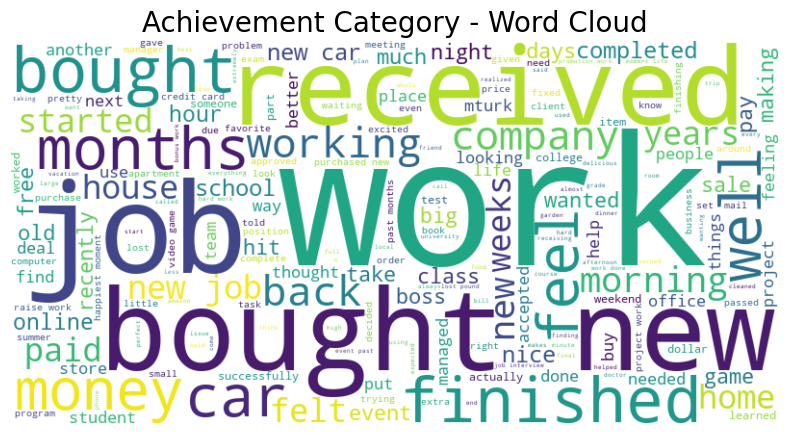

In [13]:
# Filter data for Achievement and Affection categories
achievement_data = data[data['predicted_category'] == 'achievement']
affection_data = data[data['predicted_category'] == 'affection']

LIMIT_WORDS = ['happy', 'day','able', 'got', 'went', 'finally', 'today','make', 'came','go','made', 'one', 'two', 'time', 'last', 'first', 'going', 'getting', 'took', 'found', 'lot', 'really', 'saw', 'see', 'month', 'week', 'day', 'yesterday', 'year', 'ago', 'now', 'still', 'since', 'something', 'great', 'good', 'long', 'thing', 'toi', 'without', 'yesteri', '2s', 'toand', 'ing']

# Define a function to clean and tokenize text data
def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [word for word in tokens if word not in LIMIT_WORDS]
    return tokens

# Apply the function to the narratives in each category
achievement_data['tokens'] = achievement_data['cleaned_hm'].apply(tokenize_text)
affection_data['tokens'] = affection_data['cleaned_hm'].apply(tokenize_text)

# Create a list of all words in the Achievement and Affection categories
achievement_words = [item for sublist in achievement_data['tokens'].tolist() for item in sublist]
affection_words = [item for sublist in affection_data['tokens'].tolist() for item in sublist]

# Define a function to create a word cloud
def create_word_cloud(words_list, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words_list))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Create word clouds for each category
create_word_cloud(achievement_words, 'Achievement Category - Word Cloud')

***Accomplishment Happiness -*** This is the delight or satisfaction one feels after finishing a task or reaching a specific objective. This can include a variety of successes, including both personal and professional milestones. This form of satisfaction is characterized by a sense of accomplishment that comes from one's own abilities or efforts.

***Creation and dedication Happiness -*** This stands for the joy brought about by starting something new or making a commitment. This includes the pleasure of making something from scratch, purchasing something brand-new, or devoting one's time to a cause or connection. The pleasure experienced during the act of creation or commitment itself, which frequently fosters a sense of joy or purpose, is the essence of this form of happiness.


In [25]:
# Step 1: Text Representation
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(achievement_sentences)

# Step 2: Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
achievement_data['Cluster'] = kmeans.labels_

# Step 3: Cluster Labeling
print("Accomplistment Happiness Cluster:")
print(achievement_data[achievement_data['Cluster'] == 0]['cleaned_hm'].head(10))

print("Creation and Commitent Happiness Cluster:")
print(achievement_data[achievement_data['Cluster'] == 1]['cleaned_hm'].head(10))


Accomplistment Happiness Cluster:
7      i discovered another album i heard by a band i...
18     i was very happy last hours when i received my...
69                   when my nephew got top of the marks
80     i was very happy last two months because i hav...
96     i lost pounds which is awesome considering i n...
101    i went to church tonight and heard an amazing ...
111                i received a job offer in switzerland
115           we finished making our wedding invitations
123    i was sick but as soon as i got better i jumpe...
124                      i finished reading a great book
Name: cleaned_hm, dtype: object
Creation and Commitent Happiness Cluster:
11     i was happy when i got my new incentives from ...
30                        when myself got new smartphone
33                            when i shifted my new home
34                     when my ac is shifted my new home
35                             when i purchase a new car
41           when my new home ready t

/var/folders/2j/xl2qzfzd781b4n_vgf720t2h0000gn/T/ipykernel_6224/3335467552.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achievement_data['Cluster'] = kmeans.labels_


It is crucial to distinguish the complex aspects that fall under the broad heading of "Achievement" in the context of reported happy moments in the nuanced study of human emotions and experiences. It has been shown that "achievement moments" primarily encompass two important types of happiness: "accomplishment happiness" and "creation & commitment happiness."

First off, "Accomplishment Happiness" essentially captures the joyous moments that follow the achievement of a particular objective or milestone. This aspect of happiness is strongly rooted in the satisfaction that comes from making personal sacrifices, whether they be to succeed professionally or to overcome obstacles. Such instances personify the traditional idea of achievement, where people are rewarded for their hard work and dedication.



In contrast, "Creation & Commitment Happiness" refers to the fulfillment derived from the act of producing something new or swearing allegiance to a cause or organization. This refers to happiness that results from a new purchase, the emergence of an original concept, or the start of a new adventure, whether it be in terms of a commitment to a hobby or an interest. It emphasizes a larger, although no less important, aspect of success by highlighting the joy attained from the act of creativity and dedication itself.

Together, these two dimensions of happiness comprise the category "Achievement," providing a full and detailed picture of the happy moments that depend on both achievement and the act of making or committing. 

This analysis aims to reveal the breadth and depth of human joy that is embodied within the domain of "Achievement" by recognizing and appreciating these various yet connected paths to happiness.








# Affection

**Affection:** Similarly, exploreing which narratives are categorized under affection. Highlighting instances revolving around relationships, love, family, and friendships.


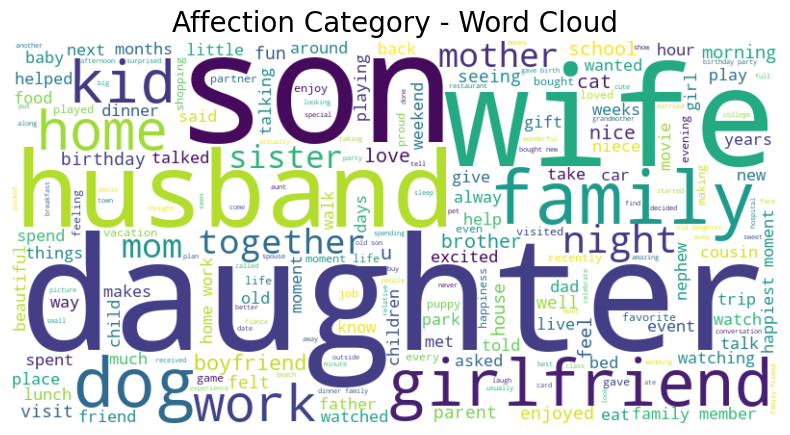

In [26]:
create_word_cloud(affection_words, 'Affection Category - Word Cloud')

***Affection Through Personal Milestones and Relationships -*** This category mostly encapsulates the delight and contentment brought forth by sustaining relationships, both romantic and familial. It expresses the intense love and fulfillment experienced upon watching the successes, recoveries, or important events in the lives of loved ones. These stories exhibit a strong sense of empathy and kinship, two qualities that are essential to the definition of attachment, and hence they embody affection.




***Affection Through Family Unity and Celebrations-*** Moments of happiness brought about by celebrations, shared experiences, and family/friends/loved one's harmony fall under this category. The stories presented here demonstrate a strong bond of unity and love and reflect the joy that comes from spending time with family/freinds/loved one's and sharing life's minor and significant moments. These stories illustrate attachment in its most vibrant form, demonstrating the joy that results from companionship and shared experiences—two essential components of affection.





In [29]:
affection_sentences = affection_data['cleaned_hm'].tolist()

# Step 1: Text Representation
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(affection_sentences)

# Step 2: Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
affection_data['Cluster'] = kmeans.labels_

# Step 3: Cluster Labeling
print("Affection Through Personal Milestones and Relationships")
print(affection_data[affection_data['Cluster'] == 0]['cleaned_hm'].head(10))

print("Affection Through Family Unity and Celebrations")
print(affection_data[affection_data['Cluster'] == 1]['cleaned_hm'].head(10))

Affection Through Personal Milestones and Relationships
0     i went on a successful date with someone i fel...
5                        talked to my romantic prospect
8     i talked to the girl dating about some interes...
9     i was happy when my son got marks in his exami...
13          when my son got recovery from their disease
14    when my mother got finalized stay for transfer...
16          when my son realize their emotions and duty
17      when my brother got a new job offer from abroad
20                    when my nephew new born yesterday
21    when my wife got recover from their cough and ...
Name: cleaned_hm, dtype: object
Affection Through Family Unity and Celebrations
10    i was very happy when my family brings me beau...
12      when my family cooked my favorite food at night
15            when my family plan a abroad tour with me
19           when my house ready to live with my family
22     when my house ready to possession with my family
26    when my family coo

/var/folders/2j/xl2qzfzd781b4n_vgf720t2h0000gn/T/ipykernel_6224/2274293112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affection_data['Cluster'] = kmeans.labels_


Each of these categories can be considered to fall under the umbrella term "affection" because they encompass many aspects of affectionate connections and relationships and show the complex tapestry of love, unity, and shared delight that serves as the foundation for affectionate experiences in human lives.




# Section 2: Gender and Happiness Narratives

# 2.1 Female Perspectives

In this section, the narratives from females will be analyzed and explore how many of them report "Achievement" and "Affection" as their primary sources of happiness. Also, describing the kind of achievements and affections they value more.

In [6]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
female_data = data[data['gender'] == 'f']

achievement_count_f = female_data[female_data['predicted_category'] == 'achievement'].shape[0]
affection_count_f = female_data[female_data['predicted_category'] == 'affection'].shape[0]

print(f"Number of 'Achievement' narratives from females: {achievement_count_f}")
print(f"Number of 'Affection' narratives from females: {affection_count_f}")

Number of 'Achievement' narratives from females: 12545
Number of 'Affection' narratives from females: 17193


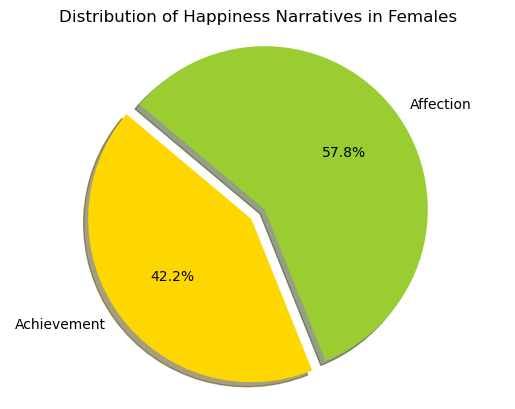

In [8]:
labels = 'Achievement', 'Affection'
sizes = [achievement_count_f, affection_count_f]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Happiness Narratives in Females')
plt.show()

In [58]:
achievement_data_f = female_data[female_data['predicted_category'] == 'achievement']
affection_data_f = female_data[female_data['predicted_category'] == 'affection']

def apply_lda(data, n_topics=3):
    # Vectorizing the text data
    vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+', stop_words='english')
    dtm = vectorizer.fit_transform(data['cleaned_hm'])
    
    # Fitting LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    
    # Getting the document-topic distribution
    doc_topic_distrib = lda.transform(dtm)
    
    # Displaying the topics
    for index, topic in enumerate(lda.components_):
        print(f'Top 10 words for topic #{index}')
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
        print('\n')
    
    return doc_topic_distrib

print('Topics in Achievement Narratives:')
doc_topic_distrib_Achievement = apply_lda(achievement_data_f, n_topics=3)

Topics in Achievement Narratives:
Top 10 words for topic #0
['good', 'time', 'project', 'day', 'happy', 'got', 'finished', 'today', 'able', 'work']


Top 10 words for topic #1
['went', 'did', 'month', 'finally', 'months', 'received', 'work', 'job', 'happy', 'got']


Top 10 words for topic #2
['game', 'finally', 'able', 'happy', 'money', 'car', 'won', 'bought', 'got', 'new']




In [59]:
dominant_topic = doc_topic_distrib_Achievement.argmax(axis=1)

dominant_topic_series = pd.Series(dominant_topic, name='Dominant_Topic')

topic_counts = dominant_topic_series.value_counts()

most_valued_topic = topic_counts.idxmax()

print(f"The most valued topic for females in the Achievment category is topic #{most_valued_topic}, with a size of {topic_counts.max()}.")

The most valued topic for females in the Achievment category is topic #2, with a size of 8537.



***Inference***

1. According to the narrative analysis for the "Achievement" category, females tend to place the most weight on personal accomplishments and material gains. Words like "able," "won," "bought," and "new" are frequently used in these narratives, demonstrating a deep appreciation for novel experiences and individual achievements.

2. The presence of phrases like "money" and "car" suggests that a noticeable emphasis is placed on the acquisition of new assets. This could imply that material possessions and personal financial success are important indicators of achievement, possibly representing prosperity and human development.

3. The frequency with which words like  "finally" appear in the most prized topic highlights a sense of satisfaction and joy received from reaching objectives or obtaining new goods. This implies that these events are not just valued but also significant sources of enjoyment for women, positively affecting their general well-being.





In [57]:
print('Topics in Affection Narratives:')
doc_topic_distrib_Affection = apply_lda(affection_data_f, n_topics=3)


Topics in Affection Narratives:
Top 10 words for topic #0
['took', 'new', 'got', 'nice', 'night', 'dinner', 'dog', 'girlfriend', 'went', 'wife']


Top 10 words for topic #1
['spent', 'love', 'long', 'moment', 'life', 'birthday', 'day', 'time', 'happy', 'family']


Top 10 words for topic #2
['sister', 'wife', 'old', 'work', 'came', 'got', 'son', 'daughter', 'happy', 'home']




In [61]:
dominant_topic = doc_topic_distrib_Affection.argmax(axis=1)

dominant_topic_series = pd.Series(dominant_topic, name='Dominant_Topic')

topic_counts = dominant_topic_series.value_counts()

most_valued_topic = topic_counts.idxmax()

print(f"The most valued topic for females in the Affection category is topic #{most_valued_topic}, with a size of {topic_counts.max()}.")

The most valued topic for females in the Affection category is topic #2, with a size of 6027.


***Inference***

1. The examination of the analysis related to "Affection" reveals a strong focus on family and domestic life, as evidenced by subject #2's dominance. Words like "son," "daughter," "home," and "wife" convey a nurturing and close-knit family atmosphere that is highly valued in addition to the emphasis put on familial relationships.

2. The narratives in this predominate theme emphasize a close bond with immediate family members by making them the focal point of joyful and adoring events. The triumphs and milestones of family members are acknowledged as personal joys, which may be a sign of a familial structure that promotes harmony and communal happiness.

3. The frequent use of the word "happy" in a variety of contexts shows how vital joy and affection are to these narratives, regardless of whether they are about a lighthearted dinner or a big life event. This is a reflection of a wholistic view of happiness in which various moments, from minor pleasures to significant events, are welcomed with equal enthusiasm and joy.


# 2.2 Male Perspectives

In this section, the narratives from males will be analyzed and explore how many of them report "Achievement" and "Affection" as their primary sources of happiness. Also, describing the kind of achievements and affections they value more.

In [9]:
male_data = data[data['gender'] == 'm']

achievement_count_m = male_data[male_data['predicted_category'] == 'achievement'].shape[0]
affection_count_m = male_data[male_data['predicted_category'] == 'affection'].shape[0]

print(f"Number of 'Achievement' narratives from females: {achievement_count_m}")
print(f"Number of 'Affection' narratives from females: {affection_count_m}")

Number of 'Achievement' narratives from females: 21177
Number of 'Affection' narratives from females: 16748


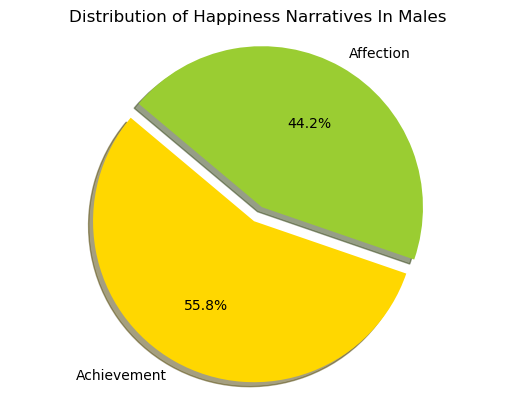

In [11]:
labels = 'Achievement', 'Affection'
sizes = [achievement_count_m, affection_count_m]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Happiness Narratives In Males')
plt.show()

In [67]:
achievement_data_m = male_data[male_data['predicted_category'] == 'achievement']
affection_data_m = male_data[male_data['predicted_category'] == 'affection']

def apply_lda(data, n_topics=3):
    # Vectorizing the text data
    vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+', stop_words='english')
    dtm = vectorizer.fit_transform(male_data['cleaned_hm'])
    
    # Fitting LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    
    # Getting the document-topic distribution
    doc_topic_distrib = lda.transform(dtm)
    
    # Displaying the topics
    for index, topic in enumerate(lda.components_):
        print(f'Top 10 words for topic #{index}')
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
        print('\n')
    
    return doc_topic_distrib

print('Topics in Achievement Narratives:')
doc_topic_distrib_Achievement_m = apply_lda(achievement_data_m, n_topics=3)

Topics in Achievement Narratives:
Top 10 words for topic #0
['moment', 'family', 'got', 'today', 'friends', 'really', 'time', 'day', 'went', 'happy']


Top 10 words for topic #1
['received', 'birthday', 'happy', 'good', 'bought', 'job', 'friend', 'work', 'new', 'got']


Top 10 words for topic #2
['won', 'night', 'watched', 'daughter', 'wife', 'able', 'time', 'favorite', 'happy', 'game']




In [68]:
dominant_topic = doc_topic_distrib_Achievement_m.argmax(axis=1)

dominant_topic_series = pd.Series(dominant_topic, name='Dominant_Topic')

topic_counts = dominant_topic_series.value_counts()

most_valued_topic = topic_counts.idxmax()

print(f"The most valued topic for Males in the Achievment category is topic #{most_valued_topic}, with a size of {topic_counts.max()}.")

The most valued topic for Males in the Achievment category is topic #0, with a size of 23075.


In [71]:
print('Topics in Affection Narratives:')
doc_topic_distrib_Affection_m = apply_lda(affection_data_m, n_topics=3)


Topics in Affection Narratives:
Top 10 words for topic #0
['moment', 'family', 'got', 'today', 'friends', 'really', 'time', 'day', 'went', 'happy']


Top 10 words for topic #1
['received', 'birthday', 'happy', 'good', 'bought', 'job', 'friend', 'work', 'new', 'got']


Top 10 words for topic #2
['won', 'night', 'watched', 'daughter', 'wife', 'able', 'time', 'favorite', 'happy', 'game']




In [72]:
dominant_topic = doc_topic_distrib_Affection_m.argmax(axis=1)

dominant_topic_series = pd.Series(dominant_topic, name='Dominant_Topic')

topic_counts = dominant_topic_series.value_counts()

most_valued_topic = topic_counts.idxmax()

print(f"The most valued topic for Males in the Affection category is topic #{most_valued_topic}, with a size of {topic_counts.max()}.")

The most valued topic for Males in the Affection category is topic #0, with a size of 23075.


***Inference***

1. Males personal achievements and affectionate experiences are connected, as seen by the similarity in the most highly regarded themes across the "Achievement" and "Affection" categories. It appears that they experience and describe happy times in a way that eloquently incorporates both significant personal achievements and heartfelt relationships, highlighting the predominance of familial and friendly attachments in their tales of individual accomplishments.

2. The abundance of the words "happy," "time," and "family" in the accomplishment narratives highlights the significant impact that interpersonal ties have on the male narratives. These terms may allude to a social or cultural framework wherein individual accomplishments are frequently valued in the presence of close friends and family, so fusing the experiences of achievement and attachment.

3. This pattern might also point to a more comprehensive view of joy and well-being among men, one in which happiness is seen as a continuum that covers both significant personal achievements and close relationships. It presents a fuller, more complex story in which personal success and the pleasure of sharing these times with loved ones are combined to create happiness.

***Contrast Between Females and Male perspectives related to happiness***

1. The statistics show a clear difference between genders in the narrative preferences. Compared to "Achievement" narratives (12,545), **females** narrate considerably more "Affection"-related happy experiences (17,193). This trend seems to imply a more affection-oriented disposition in females.






2. In contrast, **males** are more inclined to share "Achievement" stories than "Affection" stories, with 21,177 instances compared to 16,748. This could be indicative of a societal or innate preference for achievements as a source of happiness among males.


It is possible that the disparities in these narrative patterns reflect an underlying tendency: women are more inclined to identify happiness with affectionate momemts, while men place a large percentage of their satisfaction in achievements. This may also be a result of social conditioning, in which women are raised to value relationships  while males are pushed to place greater importance on accomplishments. 

# Section 3: Insight and Discussion

An important finding from the examination of happiness narratives grouped under "Achievement" and "Affection" is that interpersonal and familial ties have a significant impact on how happy situations are shaped. The gender-specific research reveals more subtle trends in how people value various experiences.







1. Achievement and Affection Predominance: The prominence of the "Achievement" and "Affection" categories in stories about pleasant events suggests that people have a tendency to value their own accomplishments and nurture close relationships. These categories, which incorporate elements of individual achievement and interpersonal harmony, appear to serve as pillars in the construction of a comprehensive story of happiness.

2. Gender-Specific Trends: The gender-focused study reveals a large overlap in the elements valued by men across both categories, highlighting a blended conception of happiness in which individual accomplishments are frequently entwined with emotional encounters. The female accounts, in comparison, show a marginally more segmented approach, more clearly distinguishing between personal triumphs and affectionate encounters.

3. Theoretical Insights: The results may provide insight into underlying societal norms and cultural perspectives that influence how happiness is expressed. A societal expectation or norm that fosters the celebration of individual accomplishments within the context of the communal or familial framework may be shown by the clear relationship between achievement and affection in males' tales.

4. Future Research: Building on this fundamental analysis, further research can explore the intricate interplay of numerous elements that affect these gender-specific tendencies in happiness narratives, leading to a deeper knowledge of human happiness and wellbeing.







In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

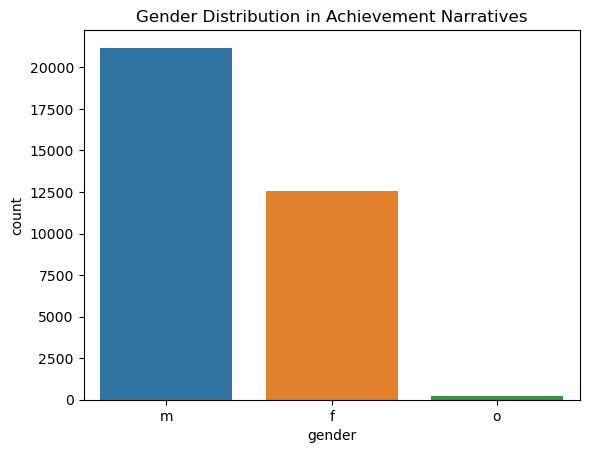

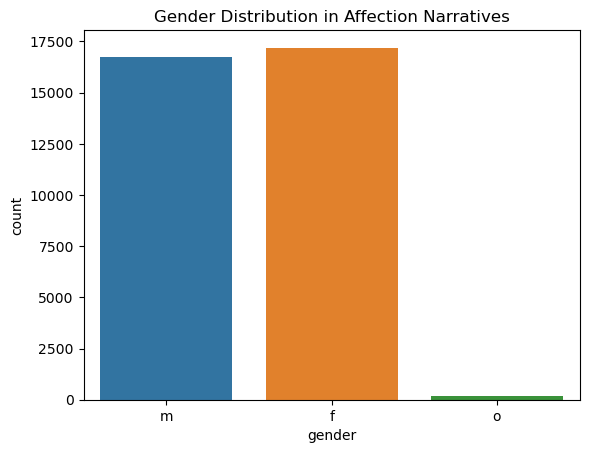

In [74]:
achievement_data = data[data['predicted_category'] == 'achievement']
affection_data = data[data['predicted_category'] == 'affection']

sns.countplot(x='gender', data=achievement_data)
plt.title('Gender Distribution in Achievement Narratives')
plt.show()

sns.countplot(x='gender', data=affection_data)
plt.title('Gender Distribution in Affection Narratives')
plt.show()


# Conclusion

The data story highlights the key role that "Achievement" and "Affection" narratives play in defining what makes a person happy. The pattern appears to be consistent across genders, with personal successes and nurturing relationships standing as key drivers to perceived happiness. These realizations inspire people to cultivate surroundings that value success and cherish emotional connections, thereby building a social fabric full of joyful experiences. These results also call for a further investigation of how to use these practical insights in public policies and community efforts that promote overall wellness and happiness.



